https://drive.google.com/file/d/1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd/view?usp=sharing

In [ ]:
! gdown 1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd

Downloading...
From: https://drive.google.com/uc?id=1wkQDfUIBwY4SO5mC1JAua9d6JBa1sCcd
To: /content/train_dataset_train.csv
100% 50.5M/50.5M [00:00<00:00, 99.1MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score

In [ ]:
import numpy as np
import pandas as pd
import torch
# import transformers
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re, string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/train_dataset_train.csv')

In [ ]:
df.head()

,id,name,groups
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10
1,1035,Мин.вода Нагутская №26 0.5л,0
2,1036,Пельмени Домашние вес ПО Прямицино.,10
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658064 entries, 0 to 658063
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      658064 non-null  int64 
 1   name    658064 non-null  object
 2   groups  658064 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.1+ MB


In [ ]:
df.isna().sum()

id        0
name      0
groups    0
dtype: int64

In [ ]:
# Функция для очистки текста 
def clean_text(text):
  text = text.lower()
  return " ".join(re.sub(r"[^а-яa-z]", ' ', text).split()) 
 
# создаем список для хранения преобразованных данных 
processed_text = []
# загружаем стоп-слова для русского языка
stop_words = stopwords.words('russian')
# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()
 
# для каждого сообщения text из столбца data['name']
for text in df['name']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words]
   
    # лемматизация
    #text = [lemmatizer.lemmatize(w) for w in text]

    text = [word for word in text if len(word) >= 3]       #исключить короткие слова и символы  
    
    # добавляем преобразованный текст в список processed_text
    processed_text.append(text)
 
# Сохраняем результат преобразования в новой колонке 'lemm_text'


In [ ]:
df['lemm_text'] = processed_text

In [ ]:
df

,id,name,groups,lemm_text,lemm_text_str
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10,"[шок, цена, пена, душа, бритья, куппер, акс]",шок цена пена душа бритья куппер акс
1,1035,Мин.вода Нагутская №26 0.5л,0,"[мин, вода, нагутская]",мин вода нагутская
2,1036,Пельмени Домашние вес ПО Прямицино.,10,"[пельмени, домашние, вес, прямицино]",пельмени домашние вес прямицино
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10,"[печенье, овсяно, гречневое, эко, бот]",печенье овсяно гречневое эко бот
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10,"[спред, растительно, жировой, масляничка, змж]",спред растительно жировой масляничка змж
...,...,...,...,...,...
658059,659093,"КАРАЧИНСКАЯ 1,5 л *6 шт мин вода",0,"[карачинская, мин, вода]",карачинская мин вода
658060,659094,Хлеб ДОНСКОЙ 350г Рузский х/з,9,"[хлеб, донской, рузский]",хлеб донской рузский
658061,659095,Печенье сахарное FORSITE Сэндвич с шоколадно-с...,6,"[печенье, сахарное, forsite, сэндвич, шоколадн...",печенье сахарное forsite сэндвич шоколадно сли...
658062,659096,"Хлеб Бабушкин подов пшен 0,55кг п/уп(ШХЗ)",9,"[хлеб, бабушкин, подов, пшен, шхз]",хлеб бабушкин подов пшен шхз


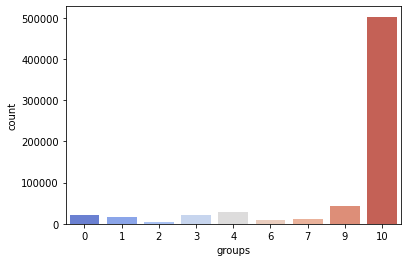

In [ ]:
sns.countplot(x='groups', data=df, palette='coolwarm');

In [ ]:
df['lemm_text_str'] = df['lemm_text'].apply(lambda x: ' '.join(x))

In [ ]:
df

,id,name,groups,lemm_text,lemm_text_str
0,1034,ШОК-ЦЕНА Пена д/душа/бритья КУППЕР 200 мл АКС,10,"[шок, цена, пена, душа, бритья, куппер, акс]",шок цена пена душа бритья куппер акс
1,1035,Мин.вода Нагутская №26 0.5л,0,"[мин, вода, нагутская]",мин вода нагутская
2,1036,Пельмени Домашние вес ПО Прямицино.,10,"[пельмени, домашние, вес, прямицино]",пельмени домашние вес прямицино
3,1037,ПЕЧЕНЬЕ ОВСЯНО-ГРЕЧНЕВОЕ ЭКО БОТ 4600508719365,10,"[печенье, овсяно, гречневое, эко, бот]",печенье овсяно гречневое эко бот
4,1038,Спред растительно-жировой Масляничка 62% 170г ...,10,"[спред, растительно, жировой, масляничка, змж]",спред растительно жировой масляничка змж
...,...,...,...,...,...
658059,659093,"КАРАЧИНСКАЯ 1,5 л *6 шт мин вода",0,"[карачинская, мин, вода]",карачинская мин вода
658060,659094,Хлеб ДОНСКОЙ 350г Рузский х/з,9,"[хлеб, донской, рузский]",хлеб донской рузский
658061,659095,Печенье сахарное FORSITE Сэндвич с шоколадно-с...,6,"[печенье, сахарное, forsite, сэндвич, шоколадн...",печенье сахарное forsite сэндвич шоколадно сли...
658062,659096,"Хлеб Бабушкин подов пшен 0,55кг п/уп(ШХЗ)",9,"[хлеб, бабушкин, подов, пшен, шхз]",хлеб бабушкин подов пшен шхз


# Train Test Split

In [ ]:
X = df['lemm_text_str']
y = df['groups']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19, stratify=y) 

# TF-IDF

In [ ]:
stopwords1 = set(stopwords.words('russian'))
# vectorizer = TfidfVectorizer(min_df=3, stop_words=stopwords1, sublinear_tf=True, ngram_range=(1, 2))
vectorizer = TfidfVectorizer(ngram_range=(1,2), #tokenizer=tokenize,
               min_df=2,  strip_accents='unicode', use_idf=1, #sublinear_tf=True max_df=0.9, smooth_idf=1, 
               )
train_features = vectorizer.fit_transform(X_train.values.astype('U'))
test_features = vectorizer.transform(X_test.values.astype('U'))
# features = vectorizer.fit_transform(df['lemm_text_str'].values)

In [ ]:
# X = features
# y = df['groups']

In [ ]:
# train_features, test_features, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19, stratify=y) # размер теста был 0,2

In [ ]:
from sklearn.metrics import recall_score

# LogisticRegression

In [ ]:
lg_model = LogisticRegression(random_state=19, class_weight='balanced')

In [ ]:
%%time
lg_model.fit(train_features, y_train)

In [ ]:
y_train_pred  = lg_model.predict(train_features)

In [ ]:
f1_logistic_train = f1_score(y_train, y_train_pred, average='weighted')
f1_logistic_train

0.9696472709424384

In [ ]:
recall_score(y_train, y_train_pred, average='weighted')

0.967326684192842

In [ ]:
y_test_pred  = lg_model.predict(test_features)

In [ ]:
f1_logistic_test = f1_score(y_test, y_test_pred, average='weighted')
f1_logistic_test

0.963573593926357

In [ ]:
recall_score(y_test, y_test_pred, average='weighted') # юез исключения коротких слов 0.960019450818302

0.9605968969866427

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred, labels=[range(11)])

array([[ 2149,     0,     0,     0,     5,     0,     0,     1,     0,
            0,     2],
       [    0,  1521,     0,     0,     0,     0,     4,     2,     0,
          108,    79],
       [    0,     0,   371,    18,     1,     0,     0,     0,     0,
            0,     0],
       [    0,     1,    10,  2092,     0,     0,     0,     0,     0,
            1,     0],
       [    2,     0,     0,     0,  2749,     0,     0,     2,     0,
            0,     6],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,   999,     0,     0,
            0,     2],
       [    0,     1,     0,     0,     0,     0,     2,  1194,     0,
            0,     8],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,   178,     0,     1,     0,     0,     1,     1,     0,
         4014,     5],
       [   34,   605,    34,    69,    95,     0,   770,   4

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

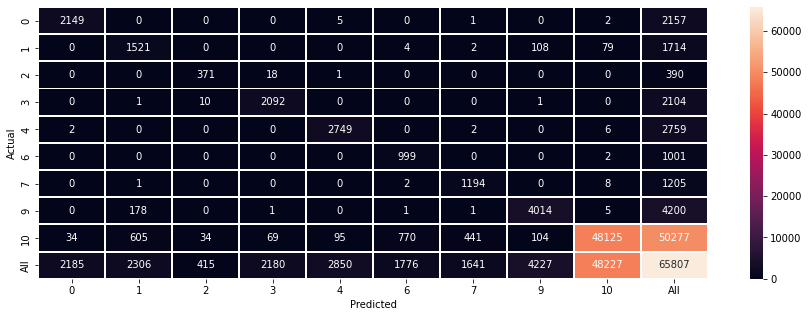

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
plt.figure(figsize = (15,5))
sn.heatmap(confusion_matrix, annot=True, linewidths=.9, fmt="d")
plt.show()

# Финальный тест

In [ ]:
sample = pd.read_csv('/content/sample_solution.csv')

In [ ]:
sample

In [ ]:
df_test = pd.read_csv('/content/test_dataset_test.csv')

In [ ]:
df_test

,id,name,lemm_text,lemm_text_str
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)","[карамель, лакомка, супермолочная, вес, рот, ф...",карамель лакомка супермолочная вес рот фронт
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1","[раэ, масло, традиц, слив]",раэ масло традиц слив
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...,"[бинт, эластичный, classic, лаймовый]",бинт эластичный classic лаймовый
3,10532,Вода мин. 1.5л пл/у (Сахалинская),"[вода, мин, сахалинская]",вода мин сахалинская
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD,"[ролики, натяжителя, ремня, amd, gta, amd]",ролики натяжителя ремня amd gta amd
...,...,...,...,...
282222,292751,Пельмени Московские Пижанка 800г,"[пельмени, московские, пижанка]",пельмени московские пижанка
282223,292752,Активиа 135гр Пробиотик малина,"[активиа, пробиотик, малина]",активиа пробиотик малина
282224,292753,Базилик овощной,"[базилик, овощной]",базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол,"[jacob, millicano, кофе, crema, espresso, раст...",jacob millicano кофе crema espresso раств мол


In [ ]:
# Функция для очистки текста 
def clean_text(text):
  text = text.lower()
  return " ".join(re.sub(r"[^а-яa-z]", ' ', text).split()) 
 
# создаем список для хранения преобразованных данных 
processed_text = []
# загружаем стоп-слова для русского языка
stop_words = stopwords.words('russian')
# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()
 
# для каждого сообщения text из столбца data['name']
for text in df_test['name']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words]     
    # лемматизация
    #text = [lemmatizer.lemmatize(w) for w in text]
    text = [word for word in text if len(word) >= 3]  
    # добавляем преобразованный текст в список processed_text
    processed_text.append(text)
 
# Сохраняем результат преобразования в новой колонке 'Processed_msg'
df_test['lemm_text'] = processed_text

In [ ]:
df_test

,id,name,lemm_text,lemm_text_str
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)","[карамель, лакомка, супермолочная, вес, рот, ф...",карамель лакомка супермолочная вес рот фронт
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1","[раэ, масло, традиц, слив]",раэ масло традиц слив
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...,"[бинт, эластичный, classic, лаймовый]",бинт эластичный classic лаймовый
3,10532,Вода мин. 1.5л пл/у (Сахалинская),"[вода, мин, сахалинская]",вода мин сахалинская
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD,"[ролики, натяжителя, ремня, amd, gta, amd]",ролики натяжителя ремня amd gta amd
...,...,...,...,...
282222,292751,Пельмени Московские Пижанка 800г,"[пельмени, московские, пижанка]",пельмени московские пижанка
282223,292752,Активиа 135гр Пробиотик малина,"[активиа, пробиотик, малина]",активиа пробиотик малина
282224,292753,Базилик овощной,"[базилик, овощной]",базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол,"[jacobs, millicano, кофе, crema, espresso, рас...",jacob millicano кофе crema espresso раств мол


In [ ]:
df_test['lemm_text_str'] = df_test['lemm_text'].apply(lambda x: ' '.join(x))

In [ ]:
df_test

,id,name,lemm_text,lemm_text_str
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)","[карамель, лакомка, супермолочная, вес, рот, ф...",карамель лакомка супермолочная вес рот фронт
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1","[раэ, масло, традиц, слив]",раэ масло традиц слив
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...,"[бинт, эластичный, classic, лаймовый]",бинт эластичный classic лаймовый
3,10532,Вода мин. 1.5л пл/у (Сахалинская),"[вода, мин, сахалинская]",вода мин сахалинская
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD,"[ролики, натяжителя, ремня, amd, gta, amd]",ролики натяжителя ремня amd gta amd
...,...,...,...,...
282222,292751,Пельмени Московские Пижанка 800г,"[пельмени, московские, пижанка]",пельмени московские пижанка
282223,292752,Активиа 135гр Пробиотик малина,"[активиа, пробиотик, малина]",активиа пробиотик малина
282224,292753,Базилик овощной,"[базилик, овощной]",базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол,"[jacobs, millicano, кофе, crema, espresso, рас...",jacobs millicano кофе crema espresso раств мол


In [ ]:
test_features = vectorizer.transform(df_test['lemm_text_str'].values)

In [ ]:
test_features.shape

(282227, 254513)

In [ ]:
X_df_test = test_features

In [ ]:
y_df_test_pred  = lg_model.predict(X_df_test)

In [ ]:
submission = pd.DataFrame({
        "id": df_test["id"],
        "groups": y_df_test_pred
    })


In [ ]:
submission

,id,groups
0,10529,10
1,10530,10
2,10531,10
3,10532,0
4,10533,10
...,...,...
282222,292751,10
282223,292752,7
282224,292753,10
282225,292754,10


In [ ]:
submission.to_csv('submission.csv', index=False)